## TASK 3 : Exploratory Data Analysis Retail

In this task is to  perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’, try to find out the weak areas where you can
work to make more profit.

## STEPS :
* Importing the libraries
* Reading the dataset
* Data Preprocessing
* EDA
* Data Visualization

## Author - Kamya

## STEP 1 : Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to ignore warnings 
import warnings as wg
wg.filterwarnings('ignore')

##  Step 2 : Reading the dataset

In [3]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Step 3 : Data Preprocessing

In [4]:
df.shape

(9994, 13)

In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [38]:
df.describe()             # for discrete values

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


This function shows statistical information about continous attributes/feature. Here are few observations
1. No missing values in dataset
2. In sales and profit the difference between max value and 75% is quite high which indicates pressence of outliers in dataset

In [37]:
df.describe(include ="all")  # for Categorical Vslues too

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


Following conclusions we can make for categorical variables:
1. There are only 4 type of shiping mde we will examin.
2. This dataset is given for 3 segmentations of people.

In [10]:
df.duplicated().sum()

17

In [13]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [14]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [15]:
df = df.drop(['Postal Code'], axis = 1)

In [16]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Step 4 : Exploratary Data Analysis

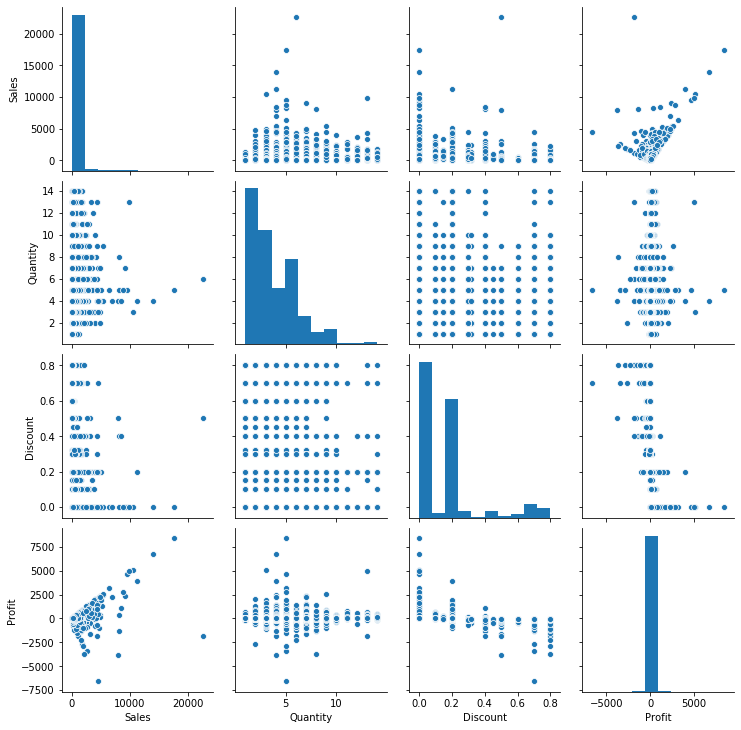

In [17]:
# visualising the dataset as whole using pair plot
import seaborn as sns
sns.pairplot(df)

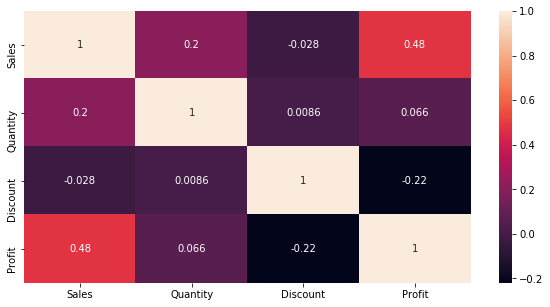

In [18]:
# finding the pairwise correlation between the columns and visualising using heatmaps

df.corr()
plt.figure(figsize=[10,5])
sns.heatmap(df.corr(), annot = True)
plt.show()

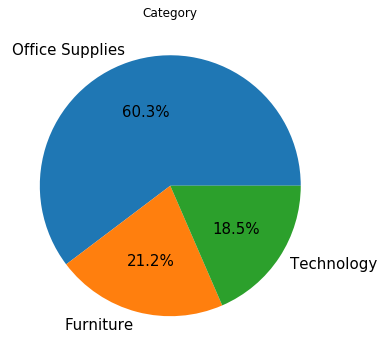

In [20]:
plt.figure(figsize =(6,6))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(df['Category'].value_counts(), labels = df['Category'].value_counts().index, autopct = '%1.1f%%',textprops = textprops)
plt.show()

<Figure size 1800x1152 with 0 Axes>

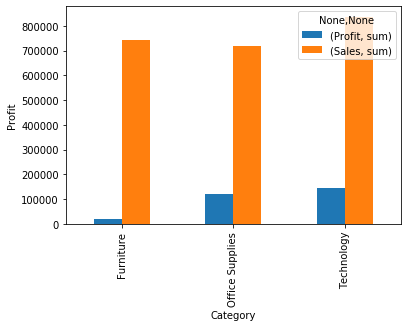

In [23]:
plt.figure(figsize = (25,16))
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

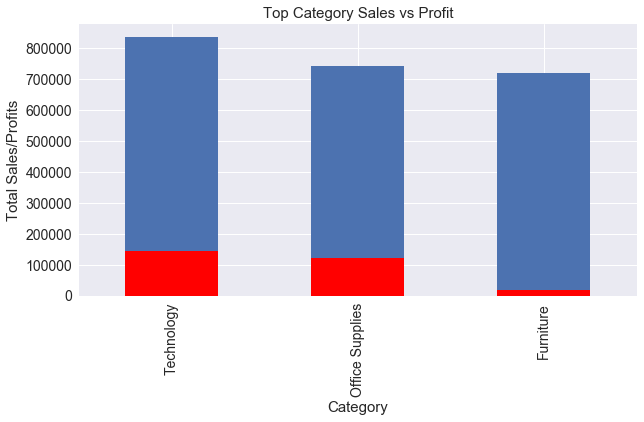

In [24]:
# computing top categories in terms of sales from first 100 observations
top_category_s = df.groupby('Category').Sales.sum().nlargest(n=100)


# computing top categories in terms of profit from first 100 observations
top_category_p = df.groupby('Category').Profit.sum().nlargest(n=100)

# plotting to see it visually
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',figsize = (10,5), fontsize = 14)
top_category_p.plot(kind = 'bar',figsize = (10,5), fontsize = 14, color = 'red')
plt.xlabel('Category', fontsize =15)
plt.ylabel('Total Sales/Profits', fontsize =15)
plt.title('Top Category Sales vs Profit',fontsize=15)
plt.show()

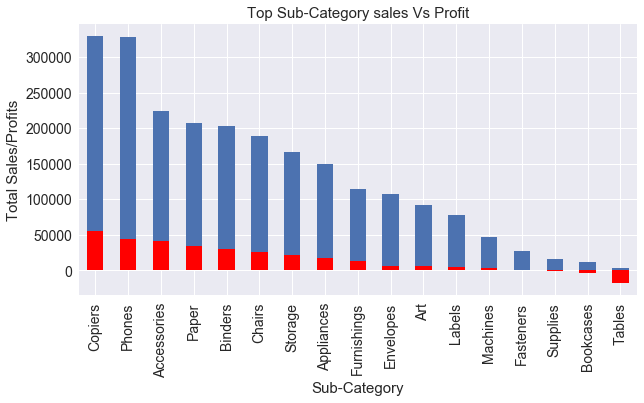

In [26]:
# computing top sub-categories in terms of sales from 100 observations
top_subcategory_s = df.groupby("Sub-Category").Sales.sum().nlargest(n = 100)

# computing top sub-categories in terms of profit from 100 observations
top_subcategory_p = df.groupby("Sub-Category").Profit.sum().nlargest(n = 100)

#plotting to see it visually
plt.style.use('seaborn')
top_subcategory_s.plot(kind = 'bar', figsize =(10,5), fontsize =14)
top_subcategory_p.plot(kind = 'bar', figsize =(10,5), fontsize =14,color ='red')
plt.xlabel('Sub-Category',fontsize=15)
plt.ylabel('Total Sales/Profits', fontsize=15)
plt.title('Top Sub-Category sales Vs Profit',fontsize = 15)
plt.show()

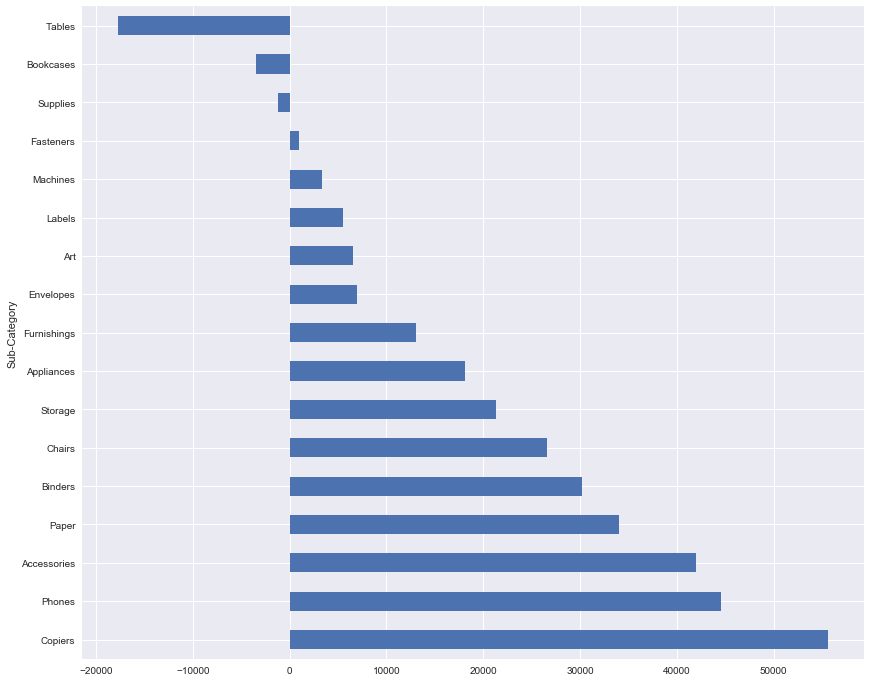

In [29]:
# A more detailed view
plt.figure(figsize = (14,12))
statewise = df.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh()   # h for horizontal

## The above graph clearly shows that Copiers and Phones have the highest sales and Profit and tables has negative profit

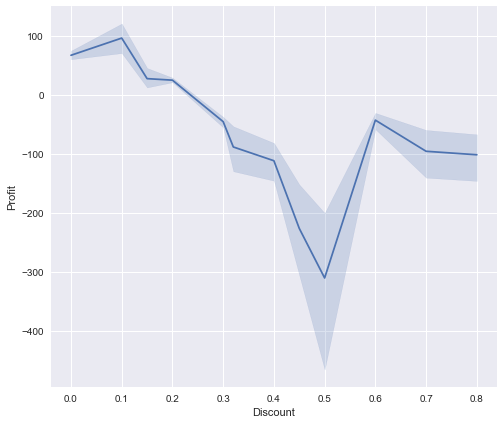

In [30]:
plt.figure(figsize = (8,7))
sns.lineplot(df['Discount'], df['Profit'], data = df)

### Visulaizing the Sales vs profits in different Region

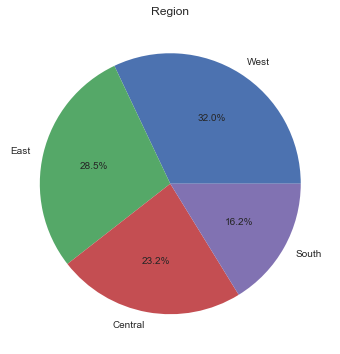

In [40]:
plt.figure(figsize = (6,6))
plt.title('Region')
plt.pie(df['Region'].value_counts(), labels = df['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

The graph sgows that West and East have same Profit through sales in East are less comapred to West

### Visualising the sales vs Profits in different states

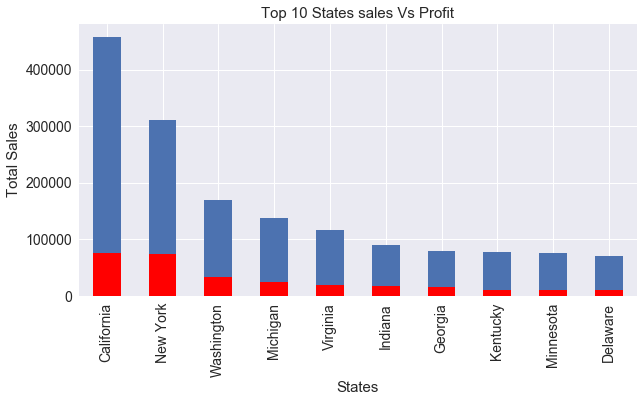

In [34]:
# computing top states in terms of sales from first 10 observations
top_states_s = df.groupby('State').Sales.sum().nlargest(n=10)

# computing top states in terms of sales from first 10 observations
top_states_p = df.groupby('State').Profit.sum().nlargest(n=10)


#plotting to see it visually
plt.style.use('seaborn')
top_states_s.plot(kind = 'bar', figsize =(10,5), fontsize =14)
top_states_p.plot(kind = 'bar', figsize =(10,5), fontsize =14,color ='red')
plt.xlabel('States',fontsize=15)
plt.ylabel('Total Sales', fontsize=15)
plt.title('Top 10 States sales Vs Profit',fontsize = 15)
plt.show()

Checking the interdependency of Sales , Profits and Discounts

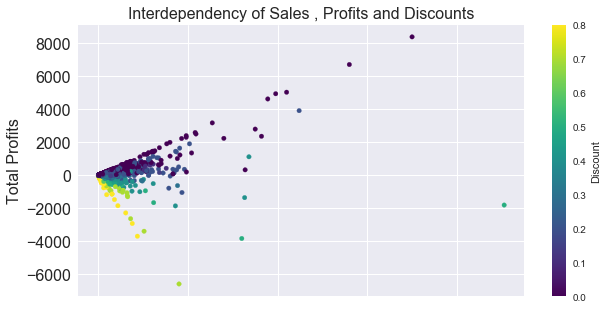

In [36]:
plt.style.use('seaborn')
df.plot(kind = "scatter", figsize=(10,5), x ='Sales', y = 'Profit', c= 'Discount', s=20,fontsize = 16,colormap ='viridis')
plt.ylabel('Total Profits', fontsize =16)
plt.title('Interdependency of Sales , Profits and Discounts',fontsize = 16)
plt.show()

### The graph clearly shows that if we give more discount on our products sales increases but profit decreases.

## Conclusion:

The week areas where one can work to make profit are:

1 . We should limit sales of furniture and increase that of technology and office suppliers as furniture has very less        profit as compared to sales.
2. Considering the sub-categories sales of tables should be minimized
3. Increase the sales more in East as profit is more
4. We should concentrate on states like 'New York' and 'California' to make more profit